# Introduction.




*Shoplytics_Regression.ipynb operationalizes the raw transactional data from Shoplytics_Nexus_Data.csv into a structured machine learning workflow. By applying regression techniques to customer and product features, the notebook models the underlying relationships that influence purchase amounts—enabling predictive insights grounded in real-world shopping behavior.*

# 1. Importing Libraries


In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Load and preview data

In [3]:
df = pd.read_csv('Shoplytics_Nexus_Data.csv', encoding='unicode_escape')
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# 3.Dropping Irrelevant Columns

In [4]:
df = df.drop(columns=['User_ID', 'Cust_name', 'Product_ID', 'unnamed1', 'Status'], errors='ignore')




# 4. Handling Missing target values.

In [5]:
df = df.dropna(subset=['Amount']).reset_index(drop=True)


# 5. Splitting Features and Target

In [6]:
y = df['Amount']
X = df.drop(columns=['Amount'])


# 6. Imputing Missing Values.

In [7]:
num_cols = X.select_dtypes(include=np.number).columns
X[num_cols] = SimpleImputer(strategy='median').fit_transform(X[num_cols])

cat_cols = X.select_dtypes(include=['object']).columns
X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])

# 7. Encoding Categorical Features.

In [8]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
enc_array = encoder.fit_transform(X[cat_cols])

enc_df = pd.DataFrame(enc_array, columns=encoder.get_feature_names_out(cat_cols), index=X.index)
X_final = pd.concat([X.drop(columns=cat_cols), enc_df], axis=1)


# 8. Train-Test Splitting

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 9. Training The Model.

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 10. Evaluating The Model

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 10212271.32
R² Score: 0.62


# 11.Plotting Residuals vs Predictions

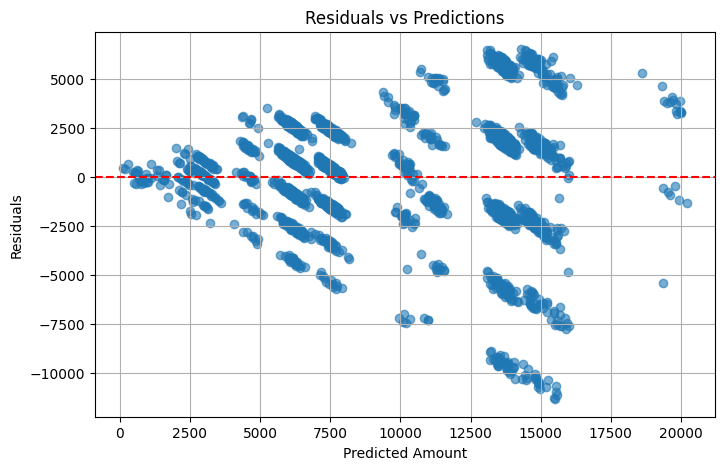

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Amount")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.grid(True)
plt.show()

# 12. Plotting Features Importances

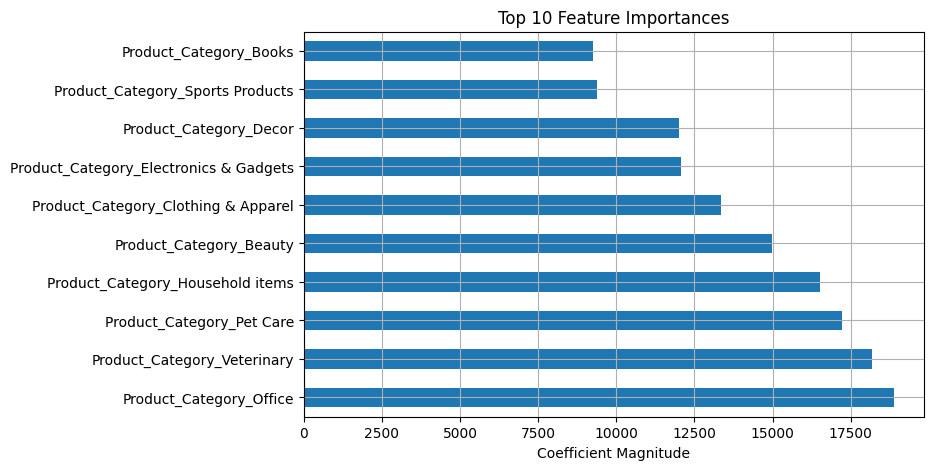

In [13]:
coefficients = pd.Series(model.coef_, index=X_train.columns)
top_features = coefficients.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_features.plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Coefficient Magnitude")
plt.grid(True)
plt.show()

# 13. Previewing Dataset

In [14]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
